In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')
# import plotly.express as px
# from mpl_toolkits import mplot3d

import sklearn
# from sklearn import preprocessing
# from sklearn.cluster import KMeans
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib
from pylab import rcParams
from tqdm import tqdm_notebook
import fbprophet

In [2]:
df = pd.read_csv('2-9_Jan_2019.csv')

df_jan = pd.read_csv('all_usage_jan_2019.csv')
df_feb = pd.read_csv('all_usage_feb_2019.csv')
df_mar = pd.read_csv('all_usage_mar_2019.csv')
df_apr = pd.read_csv('all_usage_apr_2019.csv')
df_may = pd.read_csv('all_usage_may_2019.csv')
df_jun = pd.read_csv('all_usage_jun_2019.csv')
df_jul = pd.read_csv('all_usage_jul_2019.csv')
df_aug = pd.read_csv('all_usage_aug_2019.csv')
df_sep = pd.read_csv('all_usage_sep_2019.csv')

df_all = pd.read_csv('all_usage_Jan_to_Sep_new.csv')
df_merged = pd.read_csv('usage_and_failed_search_new.csv')
df_merged_no_hol = pd.read_csv('usage_and_failed_search_no_hol.csv')
df_open = pd.read_csv('all_usage_open_new.csv')
df_open_merged = pd.read_csv('usage_and_failed_open_sem.csv')
df_close = pd.read_csv('all_usage_close_new.csv')
df_close_merged = pd.read_csv('usage_and_failed_close_sem.csv')

df_merged_no_hol

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
0,2/1/2019,07:32:13,07:34:07,07:37:43,CP#0QR54,12 CU Terrace,11 BTS-National stadium
1,2/1/2019,08:10:53,08:17:34,08:24:25,CP#0Q033,11 BTS-National stadium,01 Exit to Cham square
2,2/1/2019,08:13:42,08:16:41,08:41:07,CP#0TCY3,02 Economics,07 Chamchuri 5
3,2/1/2019,09:05:41,09:07:24,09:33:15,CP#0TM17,01 Exit to Cham square,02 Economics
4,2/1/2019,09:49:40,09:50:25,NaN,CP#0QCR8,01 Exit to Cham square,09 Chamchuri 10
...,...,...,...,...,...,...,...
20070,30/9/2019,19:51:28,19:52:58,20:12:13,CP#0WPM8,15 U Center,10 Chulapat 14
20071,30/9/2019,20:03:28,20:14:34,20:20:44,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9
20072,30/9/2019,20:04:33,NaN,NaN,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9
20073,30/9/2019,20:07:32,20:26:07,20:35:11,CP#0WD52,01 Exit to Cham square,08 Witthaya Nives


In [ ]:
mon = ['7/1/2019', '14/1/2019', '21/1/2019', '28/1/2019', '4/2/2019', '11/2/2019', '18/2/2019', '25/2/2019', '4/3/2019', '11/3/2019', '18/3/2019', '25/3/2019', '1/4/2019', '22/4/2019', '29/4/2019', '13/5/2019', '27/5/2019', '10/6/2019', '17/6/2019', '24/6/2019', '1/7/2019', '8/7/2019', '15/7/2019', '22/7/2019', '5/8/2019', '12/8/2019', '19/8/2019', '26/8/2019', '2/9/2019', '9/9/2019', '16/9/2019', '23/9/2019', '30/9/2019']
tue = ['8/1/2019', '15/1/2019', '22/1/2019', '29/1/2019', '5/2/2019', '12/2/2019', '26/2/2019', '5/3/2019', '12/3/2019', '19/3/2019', '26/3/2019', '2/4/2019', '9/4/2019', '23/4/2019', '30/4/2019', '7/5/2019', '14/5/2019', '21/5/2019', '28/5/2019', '4/6/2019', '11/6/2019', '18/6/2019', '25/6/2019', '2/7/2019', '9/7/2019', '23/7/2019', '30/7/2019', '6/8/2019', '13/8/2019', '20/8/2019', '27/8/2019', '3/9/2019', '10/9/2019', '17/9/2019', '24/9/2019']
wed = ['2/1/2019', '9/1/2019', '16/1/2019', '23/1/2019', '30/1/2019', '6/2/2019', '13/2/2019', '20/2/2019', '27/2/2019', '6/3/2019', '13/3/2019', '20/3/2019', '27/3/2019', '3/4/2019', '10/4/2019', '17/4/2019', '24/4/2019', '1/5/2019', '8/5/2019', '15/5/2019', '22/5/2019', '29/5/2019', '5/6/2019', '12/6/2019', '19/6/2019', '26/6/2019', '3/7/2019', '10/7/2019', '24/7/2019', '31/7/2019', '7/8/2019', '14/8/2019', '21/8/2019', '28/8/2019', '4/9/2019', '11/9/2019', '18/9/2019', '25/9/2019']
thu = ['3/1/2019', '10/1/2019', '17/1/2019', '24/1/2019', '31/1/2019', '7/2/2019', '14/2/2019', '21/2/2019', '28/2/2019', '7/3/2019', '14/3/2019', '21/3/2019', '28/3/2019', '4/4/2019', '11/4/2019', '18/4/2019', '25/4/2019', '2/5/2019', '16/5/2019', '23/5/2019', '30/5/2019', '6/6/2019', '13/6/2019', '20/6/2019', '27/6/2019', '4/7/2019', '11/7/2019', '18/7/2019', '25/7/2019', '1/8/2019', '8/8/2019', '15/8/2019', '22/8/2019', '29/8/2019', '5/9/2019', '12/9/2019', '19/9/2019', '26/9/2019']
fri = ['4/1/2019', '11/1/2019', '18/1/2019', '25/1/2019', '1/2/2019', '8/2/2019', '15/2/2019', '22/2/2019', '1/3/2019', '8/3/2019', '15/3/2019', '22/3/2019', '29/3/2019', '5/4/2019', '19/4/2019', '26/4/2019', '3/5/2019', '10/5/2019', '17/5/2019', '24/5/2019', '31/5/2019', '7/6/2019', '14/6/2019', '21/6/2019', '28/6/2019', '5/7/2019', '12/7/2019', '19/7/2019', '26/7/2019', '2/8/2019', '9/8/2019', '16/8/2019', '23/8/2019', '30/8/2019', '6/9/2019', '13/9/2019', '20/9/2019', '27/9/2019']

# day = []
# for slot in df_all['Date']:
#     if slot in mon:
#         day.append('mon')
#     if slot in tue:
#         day.append('tue')
#     if slot in wed:
#         day.append('wed')
#     if slot in thu:
#         day.append('thu')
#     if slot in fri:
#         day.append('fri')
# df_all['day'] = day

In [ ]:
mon.extend(tue)
mon.extend(wed)
mon.extend(thu)
mon.extend(fri)
list(set((list(dict.fromkeys(df_merged['Date']))))-set(mon))

In [ ]:
mon_merged = ['7/1/2019', '14/1/2019', '21/1/2019', '28/1/2019', '4/2/2019', '11/2/2019', '18/2/2019', '25/2/2019', '4/3/2019', '11/3/2019', '18/3/2019', '25/3/2019', '1/4/2019', '8/4/2019', '15/4/2019', '22/4/2019', '29/4/2019', '6/5/2019', '13/5/2019', '20/5/2019', '27/5/2019', '10/6/2019', '17/6/2019', '24/6/2019', '1/7/2019', '8/7/2019', '15/7/2019', '22/7/2019', '5/8/2019', '12/8/2019', '19/8/2019', '26/8/2019', '2/9/2019', '9/9/2019', '16/9/2019', '23/9/2019', '30/9/2019']
tue_merged = ['1/1/2019', '8/1/2019', '15/1/2019', '22/1/2019', '29/1/2019', '5/2/2019', '12/2/2019', '26/2/2019', '5/3/2019', '12/3/2019', '19/3/2019', '26/3/2019', '2/4/2019', '9/4/2019', '16/4/2019', '23/4/2019', '30/4/2019', '7/5/2019', '14/5/2019', '21/5/2019', '28/5/2019', '4/6/2019', '11/6/2019', '18/6/2019', '25/6/2019', '2/7/2019', '9/7/2019', '23/7/2019', '30/7/2019', '6/8/2019', '13/8/2019', '20/8/2019', '27/8/2019', '3/9/2019', '10/9/2019', '17/9/2019', '24/9/2019']
wed_merged = ['2/1/2019', '9/1/2019', '16/1/2019', '23/1/2019', '30/1/2019', '6/2/2019', '13/2/2019', '20/2/2019', '27/2/2019', '6/3/2019', '13/3/2019', '20/3/2019', '27/3/2019', '3/4/2019', '10/4/2019', '17/4/2019', '24/4/2019', '1/5/2019', '8/5/2019', '15/5/2019', '22/5/2019', '29/5/2019', '5/6/2019', '12/6/2019', '19/6/2019', '26/6/2019', '3/7/2019', '10/7/2019', '24/7/2019', '31/7/2019', '7/8/2019', '14/8/2019', '21/8/2019', '28/8/2019', '4/9/2019', '11/9/2019', '18/9/2019', '25/9/2019']
thu_merged = ['3/1/2019', '10/1/2019', '17/1/2019', '24/1/2019', '31/1/2019', '7/2/2019', '14/2/2019', '21/2/2019', '28/2/2019', '7/3/2019', '14/3/2019', '21/3/2019', '28/3/2019', '4/4/2019', '11/4/2019', '18/4/2019', '25/4/2019', '2/5/2019', '9/5/2019', '16/5/2019', '23/5/2019', '30/5/2019', '6/6/2019', '13/6/2019', '20/6/2019', '27/6/2019', '4/7/2019', '11/7/2019', '18/7/2019', '25/7/2019', '1/8/2019', '8/8/2019', '15/8/2019', '22/8/2019', '29/8/2019', '5/9/2019', '12/9/2019', '19/9/2019', '26/9/2019']
fri_merged = ['4/1/2019', '11/1/2019', '18/1/2019', '25/1/2019', '1/2/2019', '8/2/2019', '15/2/2019', '22/2/2019', '1/3/2019', '8/3/2019', '15/3/2019', '22/3/2019', '29/3/2019', '5/4/2019', '12/4/2019', '19/4/2019', '26/4/2019', '3/5/2019', '10/5/2019', '17/5/2019', '24/5/2019', '31/5/2019', '7/6/2019', '14/6/2019', '21/6/2019', '28/6/2019', '5/7/2019', '12/7/2019', '19/7/2019', '26/7/2019', '2/8/2019', '9/8/2019', '16/8/2019', '23/8/2019', '30/8/2019', '6/9/2019', '13/9/2019', '20/9/2019', '27/9/2019']
sat_merged = ['5/1/2019', '22/6/2019']

day = []
for slot in df_merged['Date']:
    if slot in mon_merged:
        day.append('1 - mon')
    if slot in tue_merged:
        day.append('2 - tue')
    if slot in wed_merged:
        day.append('3 - wed')
    if slot in thu_merged:
        day.append('4 - thu')
    if slot in fri_merged:
        day.append('5 - fri')
    if slot in sat_merged:
        day.append('6 - sat')
df_merged['Day'] = day

month = []
for slot in df_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month.append('1 (Jan)')
    elif (m == 2):
        month.append('2 (Feb)')
    elif (m == 3):
        month.append('3 (Mar)')
    elif (m == 4):
        month.append('4 (Apr)')
    elif (m == 5):
        month.append('5 (May)')
    elif (m == 6):
        month.append('6 (Jun)')
    elif (m == 7):
        month.append('7 (Jul)')
    elif (m == 8):
        month.append('8 (Aug)')
    elif (m == 9):
        month.append('9 (Sep)')
df_merged['Month'] = month

demand = []
demand = [1] * len(df_merged)
df_merged['Demand'] = demand

converted_regist = []
for slot in df_merged['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist.append(math.floor(cell))    
df_merged['Converted_Regist'] = converted_regist

df_merged

In [ ]:
depart_station_int = []
for station in df_merged['Station_depart.']:
    depart_station_int.append(int(station[0:2]))
df_merged['Station_depart_int'] = depart_station_int

dest_station_int = []
for station in df_merged['Station_dest.']:
    dest_station_int.append(int(station[0:2]))
df_merged['Station_dest_int'] = dest_station_int

day_int = []
for slot in df_merged['Date']:
    if slot in mon_merged:
        day_int.append(1)
    if slot in tue_merged:
        day_int.append(2)
    if slot in wed_merged:
        day_int.append(3)
    if slot in thu_merged:
        day_int.append(4)
    if slot in fri_merged:
        day_int.append(5)
    if slot in sat_merged:
        day_int.append(6)
df_merged['Day_int'] = day_int

month_int = []
for slot in df_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month_int.append(1)
    elif (m == 2):
        month_int.append(2)
    elif (m == 3):
        month_int.append(3)
    elif (m == 4):
        month_int.append(4)
    elif (m == 5):
        month_int.append(5)
    elif (m == 6):
        month_int.append(6)
    elif (m == 7):
        month_int.append(7)
    elif (m == 8):
        month_int.append(8)
    elif (m == 9):
        month_int.append(9)
df_merged['Month_int'] = month_int

df_merged
# converted_station_str = []
# for station in df_merged['Station_depart.']:
#     converted_station_str.append(station[0:2])

# df_merged['Converted_Station_str'] = converted_station_str

# plt.figure(figsize=(20,10))
# plt.scatter(df_merged['Converted_Station_str'], df_merged['Converted_Regist'])
# plt.show()

In [ ]:
# #get the sum of demand IN EACH HOUR of EACH Station_depart. in a day
# each_date = list(dict.fromkeys(df_merged['Date']))
# each_station = list(dict.fromkeys(df_merged['Station_depart']))
# each_hour
# demand_at_depart = []
# for

In [ ]:
day = []
for slot in df_open_merged['Date']:
    if slot in mon_merged:
        day.append('1 - mon')
    if slot in tue_merged:
        day.append('2 - tue')
    if slot in wed_merged:
        day.append('3 - wed')
    if slot in thu_merged:
        day.append('4 - thu')
    if slot in fri_merged:
        day.append('5 - fri')
    if slot in sat_merged:
        day.append('6 - sat')
df_open_merged['Day'] = day

month = []
for slot in df_open_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month.append('1 (Jan)')
    elif (m == 2):
        month.append('2 (Feb)')
    elif (m == 3):
        month.append('3 (Mar)')
    elif (m == 4):
        month.append('4 (Apr)')
    elif (m == 5):
        month.append('5 (May)')
    elif (m == 8):
        month.append('8 (Aug)')
    elif (m == 9):
        month.append('9 (Sep)')
df_open_merged['Month'] = month

demand = []
demand = [1] * len(df_open_merged)
df_open_merged['Demand'] = demand 

df_open_merged

In [ ]:
day = []
for slot in df_close_merged['Date']:
    if slot in mon_merged:
        day.append('1 - mon')
    if slot in tue_merged:
        day.append('2 - tue')
    if slot in wed_merged:
        day.append('3 - wed')
    if slot in thu_merged:
        day.append('4 - thu')
    if slot in fri_merged:
        day.append('5 - fri')
    if slot in sat_merged:
        day.append('6 - sat')
df_close_merged['Day'] = day

month = []
for slot in df_close_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 5):
        month.append('5 (May)')
    elif (m == 6):
        month.append('6 (Jun)')
    elif (m == 7):
        month.append('7 (Jul)')
    elif (m == 8):
        month.append('8 (Aug)')
df_close_merged['Month'] = month

demand = []
demand = [1] * len(df_close_merged)
df_close_merged['Demand'] = demand 

df_close_merged

In [ ]:
pd.crosstab(df_merged['Station_depart.'], df_merged['Converted_Regist'])

# df_merged_d = df_merged[df_merged['Date'] == '2/1/2019']
# pd.crosstab(df_merged_d['Station_depart.'], df_merged_d['Converted_Regist'])

# df_merged_dt = df_merged_d[df_merged_d['Converted_Regist'] == 7]
# pd.crosstab(df_merged_dt['Station_depart.'], df_merged_dt['Converted_Regist'])

# df_merged_s = df_merged[df_merged['Station_depart.'] == '01 Exit to Cham square']
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
#demand of each station each day in Jan
df_merged_s = df_merged[df_merged['Station_depart.'] == '01 Exit to Cham square']
# df_merged_sd = df_merged_s[df_merged_s['Station_depart.'] == '01 Exit to Cham square']

df_merged_hm = df_merged_s.pivot_table(index='Day', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
pd.crosstab(df_merged_s['Day'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged['merged OD'] = df_merged['Station_depart.'] + df_merged['Station_dest.']
print(len(df_merged['merged OD'].unique()))
df_merged['merged OD']

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '1 - mon']
df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '2 - tue']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '3 - wed']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '4 - thu']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '5 - fri']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '6 - sat']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_dm = df_merged.pivot_table(index='Month', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_dm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

In [ ]:
Kmean = KMeans(n_clusters=3)
X = df_merged[['Converted_Station', 'Converted_Regist', 'Usage\'']]
Kmean.fit(X)
Kmean.cluster_centers_

In [ ]:
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = df_merged['Demand']
# xline = df_merged['Converted_Station_int']
# yline = df_merged['Converted_Regist']
# ax.plot3D(xline, yline, zline, 'gray')

# # Data for three-dimensional scattered points
# zdata = df_merged['Demand']
# xdata = df_merged['Converted_Station_int']
# ydata = df_merged['Converted_Regist']
# ax.contour3D(xdata, ydata, zdata, c=zdata, cmap='Blue');

In [ ]:
X = df_merged[['Station_depart_int', 'Station_dest_int', 'Converted_Regist', 'Day_int', 'Month_int']]
y = df_merged[['Demand']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X, y)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot()

In [ ]:
col = ['Station_depart_int', 'Station_dest_int', 'Converted_Regist', 'Day_int', 'Month_int', 'Demand']
df_use = df_merged[col]
df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_use), columns=df_use.columns)
# df_standard = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
y = df_minmax[['Demand']]
# y2 = df_standard[['num_critic_for_reviews']]
df_minmax

In [ ]:
corr_minmax = df_minmax.corr()

plt.figure(figsize=(20,10))
plt.title('Correlation of Minmax Normalization')
sns.heatmap(corr_minmax, annot=True)
plt.show()

In [ ]:
X1 = df_minmax[['Station_depart_int', 'Station_dest_int', 'Converted_Regist', 'Day_int', 'Month_int']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [ ]:

regression_model_1 = LinearRegression()
regression_model_1.fit(X1_train, y1_train)
y_predicted_1 = regression_model_1.predict(X1_test)

rmse = mean_squared_error(y1_test, y_predicted_1)
mae = mean_absolute_error(y1_test, y_predicted_1)
r2 = r2_score(y1_test, y_predicted_1)
plt.scatter(y1_test, y_predicted_1)

print('Slope:' ,regression_model_1.coef_)
print('Intercept:', regression_model_1.intercept_)
print('Root mean squared error: ', rmse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

In [ ]:
month_ts = []
for slot in df_merged_no_hol['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month_ts.append('Jan')
    elif (m == 2):
        month_ts.append('Feb')
    elif (m == 3):
        month_ts.append('Mar')
    elif (m == 4):
        month_ts.append('Apr')
    elif (m == 5):
        month_ts.append('May')
    elif (m == 6):
        month_ts.append('Jun')
    elif (m == 7):
        month_ts.append('July')
    elif (m == 8):
        month_ts.append('Aug')
    elif (m == 9):
        month_ts.append('Sep')
df_merged_no_hol['Month'] = month_ts
df_merged_no_hol

In [ ]:
#ARIMA
df_o = df_merged_no_hol[df_merged_no_hol['Station_depart.'] == '12 CU Terrace']
df_od = df_o[df_o['Station_dest.'] == '04 Engineering']
df_od

In [ ]:
sum_date_demand = []
each_date = list(dict.fromkeys(df_od['Date']))
all_date = df_od.loc[ : , 'Date' ]

# from datetime import date, timedelta
# d = pd.to_datetime(each_date, dayfirst=True)
# date_set = set(d[0] + timedelta(x) for x in range((d[-1] - d[0]).days))
# missing = list(sorted(date_set - set(d)))
# missing = str(pd.to_datetime(missing, dayfirst=True))
# missing
# for each in missing:
#     each_date.append(each)

In [ ]:
for date in each_date:
    demand = 0
    for each in all_date:
        if date == each:
            demand += 1
    sum_date_demand.append(demand)
    
data = {'Date': each_date, 'Demand': sum_date_demand}    
df_od_new = pd.DataFrame(data)

In [ ]:
df_od_new['Date']=pd.to_datetime(df_od_new['Date'], dayfirst=True)
df_od_new.set_index('Date', inplace=True)
df_od_new

In [19]:
df_od_main2 = df_od_main
df_od_main2['Timestamp']=pd.to_datetime(df_od_main['Timestamp'], dayfirst=True)
df_od_main2.set_index('Timestamp', inplace=True)
df_od_main2

,Demand
Timestamp,
2019-01-07 07:00:00,0
2019-01-07 08:00:00,2
2019-01-07 09:00:00,0
2019-01-07 10:00:00,0
2019-01-07 11:00:00,1
...,...
2019-05-23 17:00:00,0
2019-05-23 18:00:00,0
2019-05-23 19:00:00,0


In [20]:
# ts = df_od_new['Demand']
ts = df_od_main['Demand']
ts_train = ts[:'2019-04-30']
ts_train2 = ts[:'2019-05-23']
ts_test1 = ts['2019-05-01':'2019-05-23']
ts_test2 = ts['2019-08-13':]
# plt.figure(figsize=(20,10))
# plt.plot(ts_train)
# plt.plot(ts_test1)
# plt.plot(ts_test2)

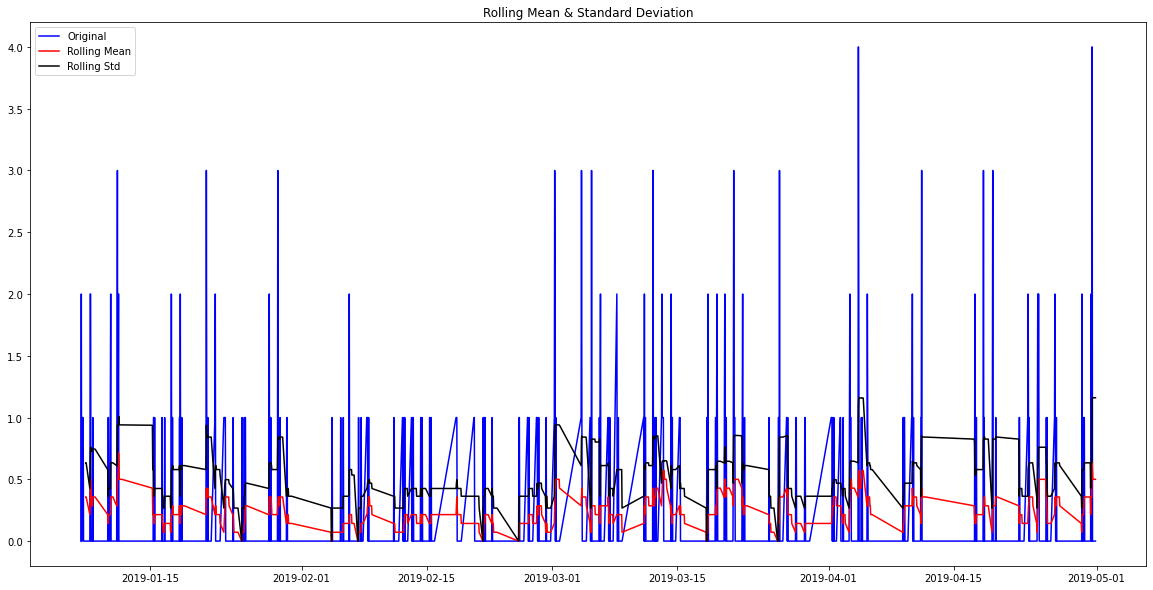

Results of Dickey-Fuller Test:
Test Statistic                -6.449618e+00
p-value                        1.535043e-08
#Lags Used                     1.600000e+01
Number of Observations Used    1.078000e+03
Critical Value (1%)           -3.436431e+00
Critical Value (5%)           -2.864225e+00
Critical Value (10%)          -2.568200e+00
dtype: float64


In [21]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=15).mean()
    rolstd = timeseries.rolling(window=15).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(ts_train)

In [ ]:
ts_log = np.log(ts_train)
plt.figure(figsize=(20,10))
plt.plot(ts_log)

In [ ]:
moving_avg = ts_log.rolling(5).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

# moving_avg = ts.rolling(9).mean()
# plt.figure(figsize=(20,10))
# plt.plot(ts)
# plt.plot(moving_avg, color='red')

In [ ]:
ts_log_no_mavg = ts_log - moving_avg
ts_log_no_mavg

# ts_no_mavg = ts - moving_avg
# ts_no_mavg

In [ ]:
ts_log_no_mavg.dropna(inplace=True)
ts_log_no_mavg

# ts_no_mavg.dropna(inplace=True)
# ts_no_mavg

In [ ]:
test_stationarity(ts_log_no_mavg)
# test_stationarity(ts_no_mavg)

In [ ]:
expweighted_avg = ts_log.ewm(halflife=5).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

In [ ]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
decomposition = seasonal_decompose(ts_train, period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(ts_train, label='Original')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
lag_acf = acf(ts_train, nlags=20)
lag_pacf = pacf(ts_train, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.tight_layout()

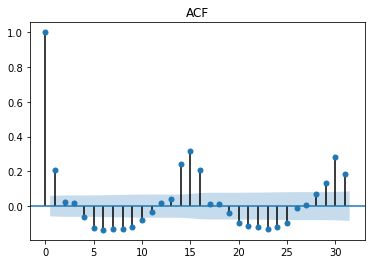

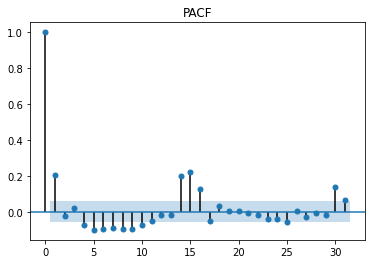

In [27]:
#if there are equal size, pick the latter one
plot_acf(ts_train, title='ACF')
plot_pacf(ts_train, title='PACF')
plt.show()

In [ ]:
model = ARIMA(ts_train, order=(1, 1, 0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_train)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-ts_train)**2))

In [ ]:
model = ARIMA(ts_train, order=(0, 1, 1))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_train)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues-ts_train)**2))

In [ ]:
model = ARIMA(ts_train, order=(1, 1, 1))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues-ts_train)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

In [ ]:
predictions_ARIMA_log = pd.Series(ts_train.iloc[0], index=ts_train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
print(predictions_ARIMA_log)

In [ ]:
# predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA_log
plt.figure(figsize=(20,10))
plt.plot(ts_train)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f' %np.sqrt(sum((predictions_ARIMA-ts_train)**2)/len(ts_train)))

In [ ]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [46]:
rcParams['figure.figsize'] = 18, 8
# ts_sarima = ts_train
df_od_main2 = df_od_main
df_od_main2['Date']=pd.to_datetime(df_od_main['Timestamp'], dayfirst=True)
df_od_main2 = df_od_main2.drop(['Timestamp'], axis=1)
df_od_main2.set_index('Date', inplace=True)
df_od_main2
ts_sarima = df_od_main['Demand']
# ts_log_sarima = np.log(ts_sarima)
decomposition = sm_api.tsa.seasonal_decompose(ts_sarima, model='add', period=70)
fig = decomposition.plot()
plt.show()

KeyError: 'Timestamp'

In [45]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 15) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 15)
SARIMAX: (0, 0, 1) x (0, 1, 0, 15)
SARIMAX: (0, 1, 0) x (0, 1, 1, 15)
SARIMAX: (0, 1, 0) x (1, 0, 0, 15)


In [47]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(ts_train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 15)5 - AIC:2100.2081194938146
ARIMA(0, 0, 0)x(0, 0, 1, 15)5 - AIC:1927.272222575778
ARIMA(0, 0, 0)x(0, 1, 0, 15)5 - AIC:2176.5026822533896
ARIMA(0, 0, 0)x(0, 1, 1, 15)5 - AIC:1538.8941426787942
ARIMA(0, 0, 0)x(1, 0, 0, 15)5 - AIC:1841.2209280560587
ARIMA(0, 0, 0)x(1, 0, 1, 15)5 - AIC:1573.3935528077727
ARIMA(0, 0, 0)x(1, 1, 0, 15)5 - AIC:1877.9352895699521
ARIMA(0, 0, 0)x(1, 1, 1, 15)5 - AIC:1540.893988038701
ARIMA(0, 0, 1)x(0, 0, 0, 15)5 - AIC:1979.9392043138782
ARIMA(0, 0, 1)x(0, 0, 1, 15)5 - AIC:1879.077348982466
ARIMA(0, 0, 1)x(0, 1, 0, 15)5 - AIC:2176.381680105145
ARIMA(0, 0, 1)x(0, 1, 1, 15)5 - AIC:1533.917498673623
ARIMA(0, 0, 1)x(1, 0, 0, 15)5 - AIC:1828.9635367136686
ARIMA(0, 0, 1)x(1, 0, 1, 15)5 - AIC:1569.7045104053964
ARIMA(0, 0, 1)x(1, 1, 0, 15)5 - AIC:1879.1880244963572
ARIMA(0, 0, 1)x(1, 1, 1, 15)5 - AIC:1535.9176549681115
ARIMA(0, 1, 0)x(0, 0, 0, 15)5 - AIC:2403.6524402498376
ARIMA(0, 1, 0)x(0, 0, 1, 15)5 - AIC:2357.845472199335
ARIMA(0, 1, 0)x(

In [ ]:
mod = sm_api.tsa.statespace.SARIMAX(ts_sarima,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-02-04'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_sarima['2019-01-07':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Daily')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = ts_sarima['2019-02-04':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-04-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
ax = ts_sarima['2019-01-07':].plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

# ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-02-04'), ts_sarima.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = ts_sarima['2019-02-04':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
pred_uc = results.get_forecast(steps=8)
pred_ci = pred_uc.conf_int()
ax = ts_sarima.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
pred_uc = results.get_forecast(steps=8)
forecast = pred_uc.predicted_mean
forecast.head(10)

In [11]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
def plot_mavg(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(14,7))
    plt.plot(rolling_mean, 'r')
    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:]-rolling_mean[window:])
        lower_bound = rolling_mean - (mae+scale*deviation)
        upper_bound = rolling_mean + (mae+scale*deviation)
        plt.plot(upper_bound, 'r--')
        plt.plot(lower_bound, 'r--')
    
    plt.plot(series[window:])

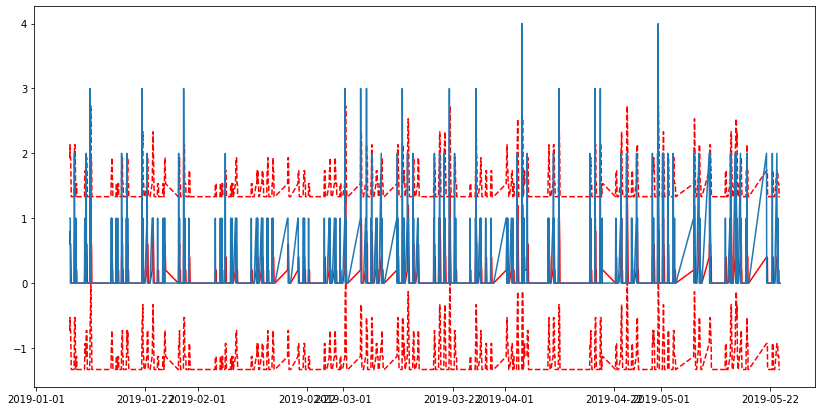

In [22]:
plot_mavg(df_od_main, 5, True)

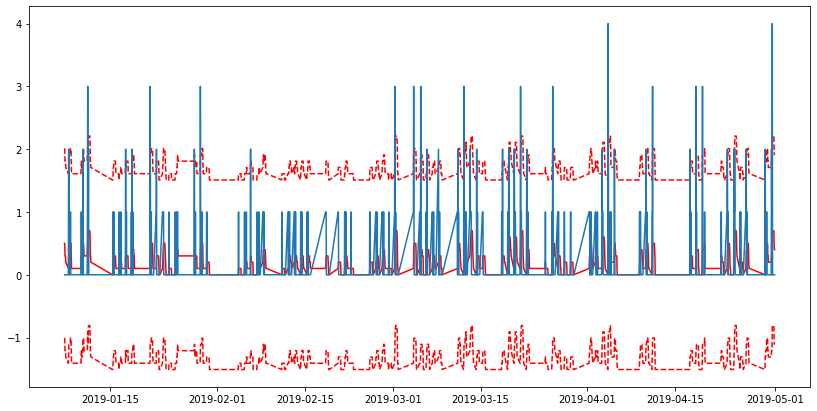

In [48]:
plot_mavg(ts_train, 10, True)

In [ ]:
plot_mavg(ts_train, 20, True)

In [ ]:
def exp_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1-alpha) * result[n-1])
    return result

def plot_exp_smoothing(series, alphas):
    plt.figure(figsize=(14,7))
    for alpha in alphas:
        plt.plot(exp_smoothing(series, alpha), label='Alpha {}'.format(alpha))
    plt.plot(series.values, "c", label='Actual')
    plt.legend(loc='upper right')
    plt.axis('tight')

plot_exp_smoothing(ts_train, [0.2, 0.5])

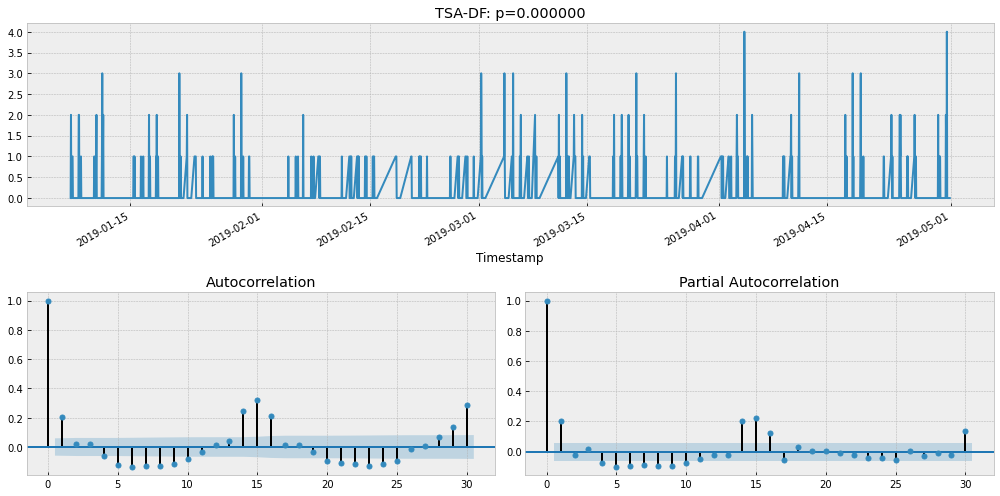

In [25]:
def ts_plot(y, lags=None, figsize=(14,7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('TSA-DF: p={0:5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
ts_plot(ts_train, lags=30)

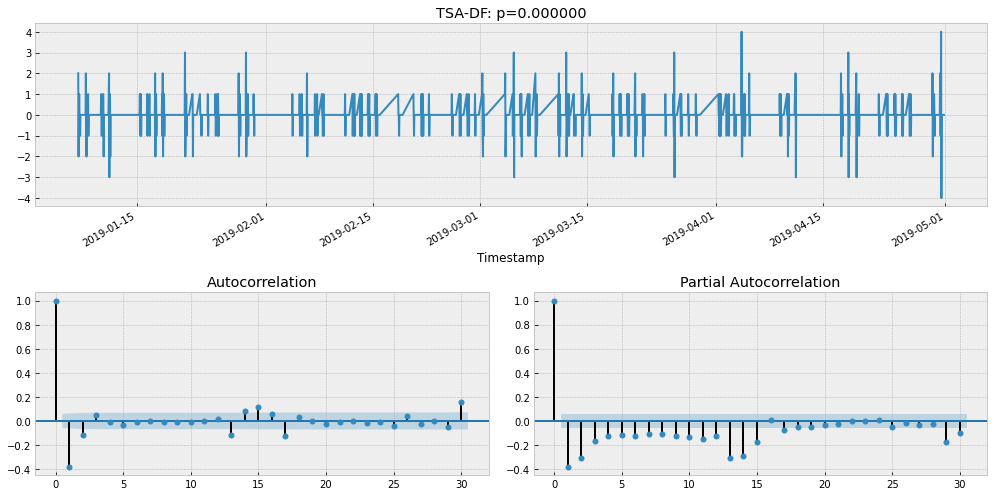

In [26]:
ts_diff = ts_train-ts_train.shift()
ts_diff.dropna(inplace=True)
ts_plot(ts_diff, lags=30)

In [49]:
ps = range(0,3)
d = 0
qs = range(0,3)
Ps = range(0,3)
D = 1
Qs = range(0,3)
s = 15

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

In [50]:
ts_train

Timestamp
2019-01-07 07:00:00    0
2019-01-07 08:00:00    2
2019-01-07 09:00:00    0
2019-01-07 10:00:00    0
2019-01-07 11:00:00    1
                      ..
2019-04-30 17:00:00    0
2019-04-30 18:00:00    0
2019-04-30 19:00:00    0
2019-04-30 20:00:00    0
2019-04-30 21:00:00    0
Name: Demand, Length: 1095, dtype: int64

In [51]:
def optimize_SARIMA(parameters_list, d, D, s):
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = sm_api.tsa.statespace.SARIMAX(ts_train, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        
        aic = model.aic
        
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [52]:
result_table = optimize_SARIMA(parameters_list, d, D, s)
print(len(result_table))


81


In [53]:
p, q, P, Q = result_table.parameters[0]
best_model = sm_api.tsa.statespace.SARIMAX(ts_train, order=(p,d,q), seasonal_order=(P,D,Q,s)).fit(disp=-1)
print(best_model.summary())

                                 SARIMAX Results                                  
Dep. Variable:                     Demand   No. Observations:                 1095
Model:             SARIMAX(0, 1, [1], 15)   Log Likelihood                -784.437
Date:                    Wed, 25 Mar 2020   AIC                           1572.873
Time:                            16:22:26   BIC                           1582.843
Sample:                                 0   HQIC                          1576.648
                                   - 1095                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L15      -0.9443      0.010    -97.891      0.000      -0.963      -0.925
sigma2         0.2427      0.005     53.402      0.000       0.234       0.252
Ljung-Box (Q):      

In [54]:
print(best_model.predict(start=ts_train.shape[0], end=ts_train.shape[0]+14))
print(mean_absolute_percentage_error(ts_test1[s+d], best_model.fittedvalues[s+d]))
# plt.plot(ts_test1)
# plt.plot(best_model.fittedvalues[s+d])

1095    0.292156
1096    1.010120
1097    1.209425
1098    0.399372
1099    0.376147
1100    0.628670
1101    0.134641
1102    0.096914
1103    0.080185
1104    0.044251
1105    0.039524
1106    0.025001
1107    0.000000
1108    0.000000
1109    0.000000
dtype: float64
nan


In [3]:
#PROPHET
df_o = df_merged_no_hol[df_merged_no_hol['Station_depart.'] == '12 CU Terrace']
df_od = df_o[df_o['Station_dest.'] == '04 Engineering']
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
87,7/1/2019,08:44:00,09:02:11,09:08:28,CP#0PFV4,12 CU Terrace,04 Engineering
88,7/1/2019,08:50:49,08:51:18,08:58:37,CP#0PVP6,12 CU Terrace,04 Engineering
97,7/1/2019,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering
110,7/1/2019,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering
122,7/1/2019,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering
...,...,...,...,...,...,...,...
19890,27/9/2019,16:16:45,16:22:32,16:27:29,CP#0SF89,12 CU Terrace,04 Engineering
19948,30/9/2019,07:59:18,NaN,NaN,CP#0SZM7,12 CU Terrace,04 Engineering
19951,30/9/2019,08:32:13,08:32:46,08:38:59,CP#0V2Y4,12 CU Terrace,04 Engineering
19953,30/9/2019,08:44:38,NaN,NaN,CP#0SLD2,12 CU Terrace,04 Engineering


In [4]:
df_od['DateTime'] = df_od[df_od.columns[0:2]].apply(lambda x : '/' .join(x.astype(str)),axis=1)
df_od['DateTime'] = df_od['DateTime'].str.replace(":", "/")
timestamp_converted = []
for slot in df_od['DateTime']:
    (d, m, y, hh, mm, ss) = slot.split('/')
    d = int(d)
    m = int(m)
    y = int(y)
    hh = int(hh)
#     mm = int(mm)
#     ss = int(ss)
#     timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=mm, second=ss)
    timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
    timestamp_converted.append(timestamp)
df_od['Timestamp'] = timestamp_converted

demand = []
demand = [1] * len(df_od)
df_od['Demand'] = demand

In [5]:
df_od['Date'] = pd.to_datetime(df_od['Date'], dayfirst=True)
df_od.set_index('Date', inplace=True)
df_od = df_od[:'2019-05-23']
df_od = df_od.reset_index()

In [6]:
df_od_main = df_od.groupby('Timestamp').sum()
df_od_main = df_od_main.reset_index()
df_od_main

,Timestamp,Demand
0,2019-01-07 08:00:00,2
1,2019-01-07 11:00:00,1
2,2019-01-07 12:00:00,1
3,2019-01-07 13:00:00,1
4,2019-01-08 08:00:00,2
...,...,...
252,2019-05-17 13:00:00,2
253,2019-05-21 07:00:00,2
254,2019-05-22 10:00:00,2
255,2019-05-23 07:00:00,2


In [7]:
date = each_timestamp = list(dict.fromkeys(df_od['Date']))
oper_time = list(range(7,22))
timestamp_missing = []

for each in date:
    each = str(each)
    each = each[0:11]
    for h in oper_time:
        (y, m, d) = each.split('-')
        d = int(d)
        m = int(m)
        y = int(y)
        hh = h
        timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_missing.append(timestamp)

timestamp_missing

[Timestamp('2019-01-07 07:00:00'),
 Timestamp('2019-01-07 08:00:00'),
 Timestamp('2019-01-07 09:00:00'),
 Timestamp('2019-01-07 10:00:00'),
 Timestamp('2019-01-07 11:00:00'),
 Timestamp('2019-01-07 12:00:00'),
 Timestamp('2019-01-07 13:00:00'),
 Timestamp('2019-01-07 14:00:00'),
 Timestamp('2019-01-07 15:00:00'),
 Timestamp('2019-01-07 16:00:00'),
 Timestamp('2019-01-07 17:00:00'),
 Timestamp('2019-01-07 18:00:00'),
 Timestamp('2019-01-07 19:00:00'),
 Timestamp('2019-01-07 20:00:00'),
 Timestamp('2019-01-07 21:00:00'),
 Timestamp('2019-01-08 07:00:00'),
 Timestamp('2019-01-08 08:00:00'),
 Timestamp('2019-01-08 09:00:00'),
 Timestamp('2019-01-08 10:00:00'),
 Timestamp('2019-01-08 11:00:00'),
 Timestamp('2019-01-08 12:00:00'),
 Timestamp('2019-01-08 13:00:00'),
 Timestamp('2019-01-08 14:00:00'),
 Timestamp('2019-01-08 15:00:00'),
 Timestamp('2019-01-08 16:00:00'),
 Timestamp('2019-01-08 17:00:00'),
 Timestamp('2019-01-08 18:00:00'),
 Timestamp('2019-01-08 19:00:00'),
 Timestamp('2019-01-

In [8]:
timestamp_fill = list(set(timestamp_missing) - set((list(dict.fromkeys(df_od_main['Timestamp'])))))
# timestamp_missing

demand_fill = []
demand_fill = [0] * len(timestamp_fill)
# demand_fill

data_fill = {'Timestamp': timestamp_fill, 'Demand': demand_fill}    
df_od_fill = pd.DataFrame(data_fill)
df_od_fill = df_od_fill.sort_values('Timestamp')
df_od_fill = df_od_fill.reset_index(drop=True)
df_od_fill

,Timestamp,Demand
0,2019-01-07 07:00:00,0
1,2019-01-07 09:00:00,0
2,2019-01-07 10:00:00,0
3,2019-01-07 14:00:00,0
4,2019-01-07 15:00:00,0
...,...,...
1043,2019-05-23 17:00:00,0
1044,2019-05-23 18:00:00,0
1045,2019-05-23 19:00:00,0
1046,2019-05-23 20:00:00,0


In [9]:
df_od_main = df_od_main.append(df_od_fill)
df_od_main = df_od_main.sort_values('Timestamp')
df_od_main = df_od_main.reset_index(drop=True)
df_od_main

,Timestamp,Demand
0,2019-01-07 07:00:00,0
1,2019-01-07 08:00:00,2
2,2019-01-07 09:00:00,0
3,2019-01-07 10:00:00,0
4,2019-01-07 11:00:00,1
...,...,...
1300,2019-05-23 17:00:00,0
1301,2019-05-23 18:00:00,0
1302,2019-05-23 19:00:00,0
1303,2019-05-23 20:00:00,0


In [10]:
df_prophet = df_od_main[['Timestamp', 'Demand']]
df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
df_prophet

,ds,y
0,2019-01-07 07:00:00,0
1,2019-01-07 08:00:00,2
2,2019-01-07 09:00:00,0
3,2019-01-07 10:00:00,0
4,2019-01-07 11:00:00,1
...,...,...
1300,2019-05-23 17:00:00,0
1301,2019-05-23 18:00:00,0
1302,2019-05-23 19:00:00,0
1303,2019-05-23 20:00:00,0


In [ ]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)
# df_prophet['cap'] = 10
# df_prophet['floor'] = 0
# m = Prophet(growth='logistic', changepoint_prior_scale=0.5)
m = Prophet(changepoint_prior_scale=0.2) 
m.fit(df_prophet)

In [ ]:
future = m.make_future_dataframe(periods=720, freq='H')
# future['cap'] = 10
# future['floor'] = 0
future = future[(future['ds'].dt.hour >= 7) & (future['ds'].dt.hour <=21)]
forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat']:
#     if (each < 0):
#         new = 0
#     elif (((each*10)%10) >= 5):
#         new = math.ceil(each)
#     else:
    each = math.ceil(each)
    yhat_round.append(new)
# forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
m.plot(forecast)

In [ ]:
def make_comparison_dataframe(historical, forecast):
#     yhat_ceil = []
#     for each in forecast['yhat']:
#         new = math.floor(each)
# #         print(new)
#         yhat_ceil.append(new)
#     forecast['yhat_ceil'] = yhat_ceil
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df_prophet, forecast)

def cal_fc_err(df, prediction_size):
    df = df.copy()
    df['e'] = df['y'] - df['yhat']
#     print(df['e'])
    df['p'] = 100 * df['e'] / df['y']
    print(df['p'])
    predicted_part = df[-prediction_size:]
    
    err_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': err_mean('p'), 'MAE': err_mean('e')}

for err_name, err_value in cal_fc_err(cmp_df, 720).items():
    print(err_name, err_value)

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,horizon = '1 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
print(len(df_prophet))